In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import seaborn as sns

In [3]:
data = pd.read_excel("./Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)
#data

In [4]:
data['Fecha- hora de lectura'] = (data['Fecha- hora de lectura'] - data['Fecha- hora de lectura'].min())  / np.timedelta64(1,'D')
#data.drop(['Fecha- hora de lectura'], axis=1, inplace=True)

In [5]:
data.columns

Index(['Fecha- hora de lectura', 'POTENCIA TRAFO 2', 'POTENCIA TRAFO 3',
       'POTENCIA TRAFO 4', 'POTENCIA TRAFO 5', 'POTENCIA MEDIA CONECTADA',
       'PERIODO P6', 'CONTROL FRÍO', 'CONTROL CALOR',
       'CAPACIDAD BOMBA CALOR FELIPE %', 'CAPACIDAD BOMBA CALOR CARLOS %',
       'POTENCIA BOMBA CALOR FELIPE', 'POTENCIA BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR CARLOS',
       'TEMPERATURA AMBIENTE BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
       'CAPACIDAD GRUPO DE FRÍO 1', 'CAPACIDAD GRUPO DE FRÍO 2',
       'POTENCIA GRUPO FRÍO 1', 'POTENCIA GRUPO FRÍO 2',
       'ENTRADA AGUA A TORRE 1', 'SALIDA AGUA TORRE 1',
       'ENTRADA AGUA A TORRE 2', 'SALIDA AGUA TORRE 2',
       'C_O_P MÁQUINA GRUPO FRÍO 1', 'C_O_P MÁQUINA GRUPO FRÍO 2',
       'C_O_P BOMBA CALOR CARLOS', 'C_O_P BOMBA CALOR FELIPE',
       'TEMPERATURA SALIDA BOMBA CALOR CARLOS',
       'TEMPERATURA SALIDA BOMBA CALOR FELIPE',
       'KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS',
       'KILO CALO

In [6]:
newData = data.drop(['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA BOMBA CALOR CARLOS', 'POTENCIA GRUPO FRÍO 1', 'POTENCIA GRUPO FRÍO 2'], axis=1)

In [7]:
correlacion = data.corr()
#correlacion

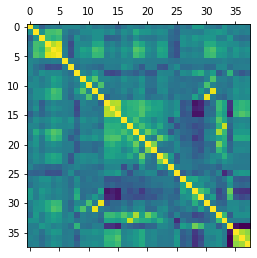

In [8]:
plt.matshow(data.corr())

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

Los valores a predecir son: 'POTENCIA BOMBA CALOR FELIPE', 'POTENCIA BOMBA CALOR CARLOS', 'POTENCIA GRUPO FRÍO 1', 'POTENCIA GRUPO FRÍO 2'

## Regresión Lineal

In [10]:
from sklearn.linear_model import LinearRegression

def linearRegression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Linear Regression is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [11]:
X = newData

The accuracy of Linear Regression is:  0.9250420926774717
The predicts are:  [30.58246931 27.88195152 78.41879136 ... 82.03057541 48.29977324
  5.09806897]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

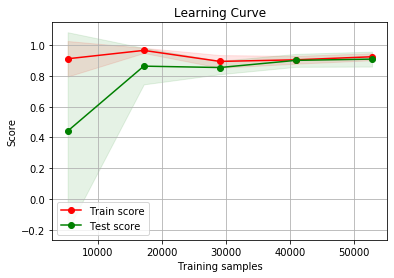

In [12]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = linearRegression(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Linear Regression is:  0.9446483356919819
The predicts are:  [-2.42821245 38.09054627  5.03992298 ...  0.59562529 70.4755692
 -1.97873002]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

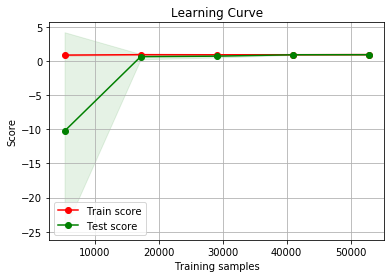

In [13]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = linearRegression(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Linear Regression is:  0.8230663221717563
The predicts are:  [-3.21983933 -3.82423799 67.43865834 ...  4.64207122 18.97482746
 -6.47447542]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

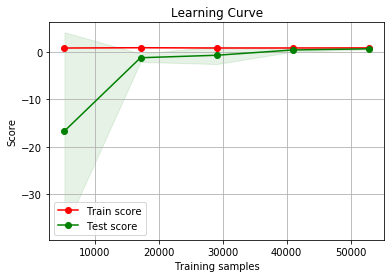

In [14]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = linearRegression(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Linear Regression is:  0.7676898654259867
The predicts are:  [25.78084463 19.22570505 17.78953702 ... 12.69231485  8.56776439
 -4.04405559]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

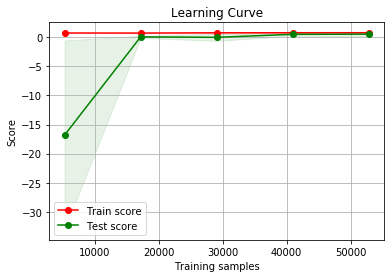

In [15]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = linearRegression(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## Extra Trees Regressor

Esta clase implementa un metaestimulador que se ajusta a varios árboles de decisión aleatorios en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste.

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

def extraTreesRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = ExtraTreesRegressor(n_estimators=10, max_depth=5)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Extra Trees Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [19]:
X = newData

The accuracy of Extra Trees Regressor is:  0.9458627637081053
The predicts are:  [105.29516015   1.42368363   1.31808633 ...   1.31808633  15.34923574
   4.93467112]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

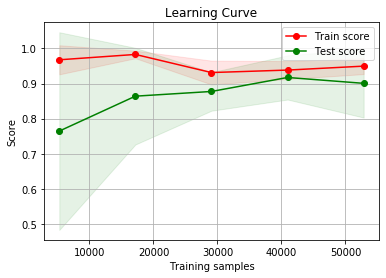

In [20]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = extraTreesRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Extra Trees Regressor is:  0.9571604992762788
The predicts are:  [53.9085645  77.9673111   1.25760074 ...  4.52631556  2.01577049
 46.04747926]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

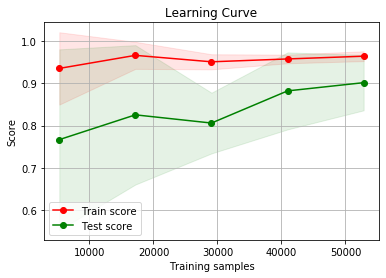

In [21]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = extraTreesRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Extra Trees Regressor is:  0.9116339133781046
The predicts are:  [12.46252177 73.00709988 12.11740993 ... 52.21763677  4.30503539
  0.88001973]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

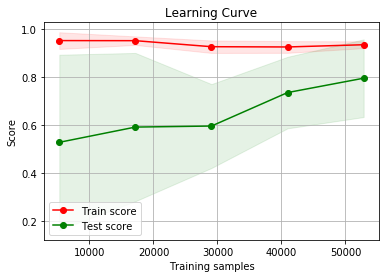

In [22]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = extraTreesRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Extra Trees Regressor is:  0.9539851442479111
The predicts are:  [70.11236547  1.90093108  1.45821828 ...  1.45821828  1.45821828
 29.67625384]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

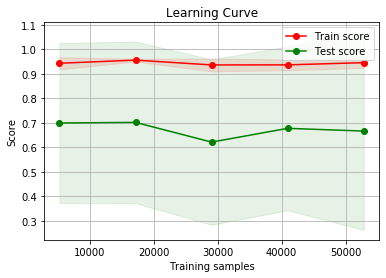

In [24]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = extraTreesRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## KNeighbors Regressor

Regresión basada en k vecinos más cercanos.
El objetivo se predice mediante la interpolación local de los objetivos asociados a los vecinos más cercanos en el conjunto de entrenamiento.

In [25]:
from sklearn.neighbors import KNeighborsRegressor

def kNeighborsRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    neigh = KNeighborsRegressor(n_neighbors=4)
    neigh.fit(X_train, y_train) 
    predicts = neigh.predict(X_test)
    acc = neigh.score(X_test, y_test)
    print("The accuracy of KNeighbors Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return neigh

In [26]:
X = newData

The accuracy of KNeighbors Regressor is:  0.9472931779848431
The predicts are:  [0.70000002 0.63999999 0.69999999 ... 0.60000002 0.63999999 0.63999999]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

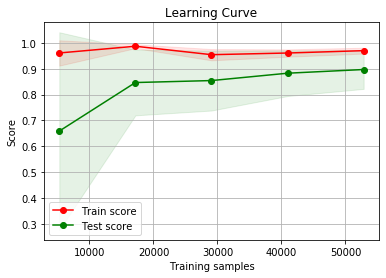

In [27]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
neighCalorFelipe = kNeighborsRegressor(X, yCalorFelipe)
plot_learning_curve(neighCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of KNeighbors Regressor is:  0.9488465376241636
The predicts are:  [  0.47999999   0.48       145.63466644 ...  72.52533531   0.44
   0.44      ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

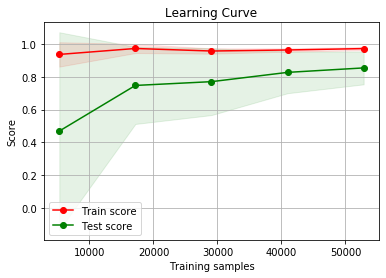

In [28]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
neighCalorCarlos = kNeighborsRegressor(X, yCalorCarlos)
plot_learning_curve(neighCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of KNeighbors Regressor is:  0.8411635010310285
The predicts are:  [ 0.1        59.66666698  0.1        ... 59.47833252  0.1
 57.88583374]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

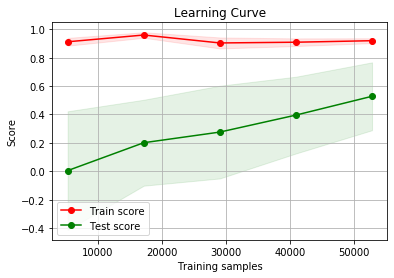

In [29]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
neighFrio1 = kNeighborsRegressor(X, yFrio1)
plot_learning_curve(neighFrio1, "Learning Curve", X, yFrio1)

The accuracy of KNeighbors Regressor is:  0.8973001271248603
The predicts are:  [ 8.36833305  0.1         6.81416674 ... 60.01249981 80.09999847
 80.09999847]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

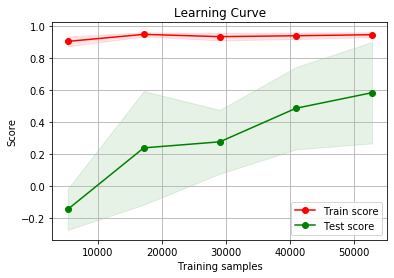

In [30]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
neighFrio2 = kNeighborsRegressor(X, yFrio2)
plot_learning_curve(neighFrio2, "Learning Curve", X, yFrio2)

## Random Forest Regressor

Un *Random Forest* es un metaestimulador que se ajusta a varios árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. 
El tamaño de la submuestra siempre es el mismo que el tamaño de la muestra de entrada original.

In [36]:
from sklearn.ensemble import RandomForestRegressor

def randomForestRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = RandomForestRegressor(n_estimators=50, max_depth=4)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Random Forest Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [37]:
X = newData

The accuracy of Random Forest Regressor is:  0.944443494577677
The predicts are:  [ 1.67261759 18.66440823 90.4347831  ... 18.66440823  1.67261759
 91.18204706]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

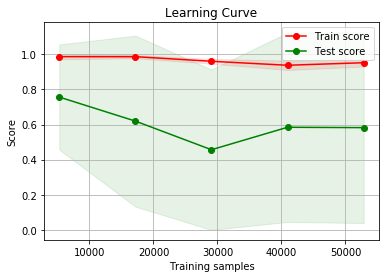

In [38]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = randomForestRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Random Forest Regressor is:  0.9667386715804986
The predicts are:  [ 0.56405302 88.87678839 88.87678839 ... 66.24767953  0.56405302
  0.56405302]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

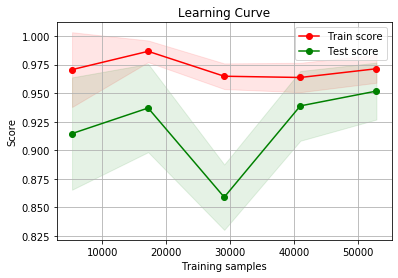

In [39]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = randomForestRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Random Forest Regressor is:  0.9552078926045847
The predicts are:  [ 0.55138558 51.91939029  6.78624875 ... 78.33499657 43.08027481
  0.55138558]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

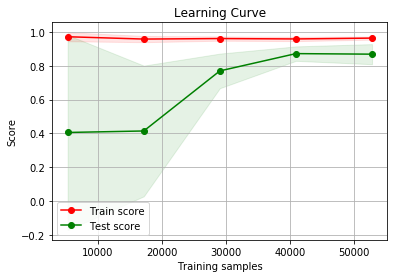

In [40]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = randomForestRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Random Forest Regressor is:  0.9611881208417457
The predicts are:  [ 0.99204125 50.23177747  0.99204125 ... 13.53740896  0.99204125
 71.34072245]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

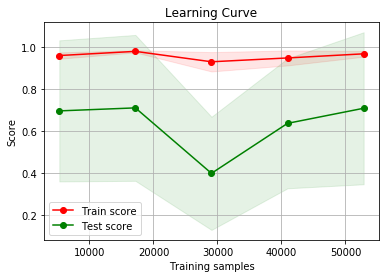

In [41]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = randomForestRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

def decisionTreeRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    reg = DecisionTreeRegressor(max_depth=4)
    reg.fit(X_train, y_train)
    predicts = reg.predict(X_test)
    acc = reg.score(X_test, y_test)
    print("The accuracy of Decision Tree Regressor is: ", acc)
    print("The predicts are: ", predicts)
    return reg

In [43]:
X = newData

The accuracy of Decision Tree Regressor is:  0.9410666833300898
The predicts are:  [  1.7119121    1.7119121   18.29837682 ... 107.92993563  39.1435682
  51.42690728]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

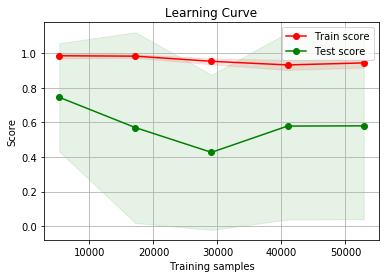

In [44]:
yCalorFelipe = data['POTENCIA BOMBA CALOR FELIPE']
regCalorFelipe = decisionTreeRegressor(X, yCalorFelipe)
plot_learning_curve(regCalorFelipe, "Learning Curve", X, yCalorFelipe)

The accuracy of Decision Tree Regressor is:  0.9659381295669324
The predicts are:  [ 0.58729801  0.58729801  0.58729801 ...  0.58729801  0.58729801
 43.40037992]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

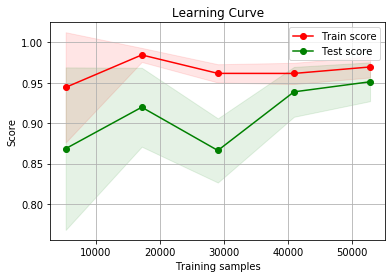

In [45]:
yCalorCarlos = data['POTENCIA BOMBA CALOR CARLOS']
regCalorCarlos = decisionTreeRegressor(X, yCalorCarlos)
plot_learning_curve(regCalorCarlos, "Learning Curve", X, yCalorCarlos)

The accuracy of Decision Tree Regressor is:  0.9540067661664592
The predicts are:  [42.8476346   0.5380018   0.5380018  ... 78.13597274  0.5380018
 42.8476346 ]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

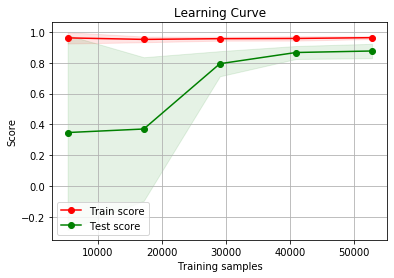

In [46]:
yFrio1 = data['POTENCIA GRUPO FRÍO 1']
regFrio1 = decisionTreeRegressor(X, yFrio1)
plot_learning_curve(regFrio1, "Learning Curve", X, yFrio1)

The accuracy of Decision Tree Regressor is:  0.9591487605607519
The predicts are:  [ 1.00443369  1.00443369 79.67016831 ... 31.95382785  1.00443369
 71.36777144]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

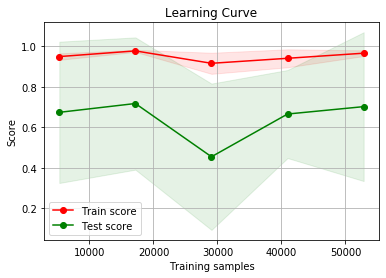

In [47]:
yFrio2 = data['POTENCIA GRUPO FRÍO 2']
regFrio2 = decisionTreeRegressor(X, yFrio2)
plot_learning_curve(regFrio2, "Learning Curve", X, yFrio2)

## MultiOutput Regressor

Esta estrategia consiste en ajustar un *regressor* por objetivo. 
Esta es una estrategia simple para extender *regressors* que no admiten de forma nativa la regresión de múltiples objetivos.